In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.integrate as integrate
init_printing()          
%matplotlib inline 
sns.set(style="darkgrid")

In [52]:
df = pd.read_csv('mu_pantheon.csv')

In [53]:
df.head()

,redshift,mu,error
0,0.01012,33.25745,0.19825
1,0.01038,33.39960,0.20480
2,0.01043,33.27480,0.20035
3,0.01082,33.35860,0.18445
4,0.01209,33.32910,0.19140


In [54]:
df.tail()

,redshift,mu,error
1043,1.550,45.35705,0.18565
1044,1.700,45.40920,0.28320
1045,1.800,45.55110,0.18795
1046,1.914,45.51090,0.25590
1047,2.260,46.22700,0.25480


In [24]:
df.columns = ['redshift', 'mu', 'error']

In [25]:
len(df)

In [26]:
df.dtypes

redshift    float64
mu          float64
error       float64
dtype: object

In [55]:
x = df.redshift
y = df.mu
yerr = df.error
z, d = symbols('z, d')

In [56]:
len(yerr)

In [34]:
#x values
a = np.arange(0, 2.3, 0.005)

#Omega_m
Omega_m1 = 0.3
Omega_m2 = 1

#Hubble Constant
H_0 = 70*10**3

#Speed of Light
c = 3*10**8

#Integral Functions
d = (Omega_m1*(1+a)**3+(1-Omega_m1))**-0.5
f = (Omega_m2*(1+a)**3+(1-Omega_m2))**-0.5

#Integration
w = integrate.cumtrapz(d, a)
v = integrate.cumtrapz(f, a)

In [36]:
a = a[:-1]

In [37]:
m = 5*np.log10(c/H_0*(1+a)*w)+25
n = 5*np.log10(c/H_0*(1+a)*v)+25

In [57]:
def plot(x, y, yerr, ax, title, x_label, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.errorbar(x,y,yerr=yerr,ls='')
    #ax.plot(x,y) #,yerr=yerr,ls='')
    ax.margins(x=0,y=0)

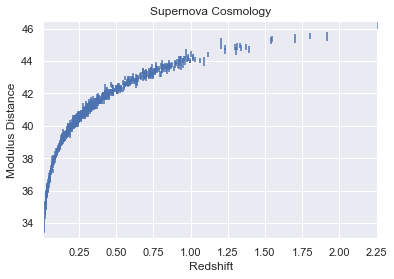

In [58]:
fig, ax = plt.subplots()
plot(x, y, yerr, ax, 'Supernova Cosmology', 'Redshift', 'Modulus Distance')

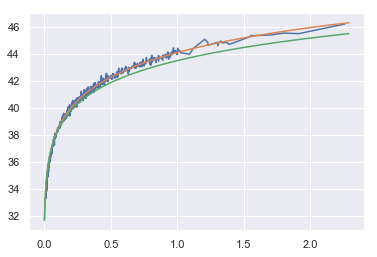

In [42]:
plt.plot(x, y)
plt.plot(a, m)
plt.plot(a, n)
plt.show()

Omega_m = 0.3 H_0 = 70 km/s/Mpc

H^2(z) = H_0^2 (Omega_m (1+z)^3 + (1.-Omega_m))

d(z) = c/(1+z) \int_0^z 1/H(z') dz'

mu = 5 log_10(d/1 Mpc) + 25

In [15]:
import scipy.integrate as integrate
d = (0.3*(1+x)**3+0.7)**-0.5

In [16]:
len(d)

In [17]:
x = np.array(x)
x = np.insert(x,0,0)

In [18]:
len(x)

In [19]:
x = x[:-1]

In [20]:
a = integrate.cumtrapz(d, x)

In [21]:
x = x[:-1]

In [22]:
len(x)

In [23]:
m = 5*np.log10((3*10**5*(1+x)/70)*a)+25

In [24]:
yerr = yerr[:-1]

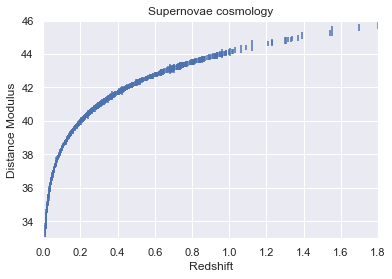

In [25]:
fig, ax = plt.subplots()
plot(x, m, yerr, ax, 'Supernovae cosmology', 'Redshift', 'Distance Modulus')